 # Working with SWOT and NOAA data

### Introduction
The purpose of this notebook is to plot the SWOT data and then overlay the drifter on top of it.

### Data Sources
- Drifter Data:
  - Source: NOAA
  - Data Product: Global Drifter Program Current of NOAA
  - Collection Frequency: Every 6 hours
  - Total Number of Drifters: 136
  - https://erddap.aoml.noaa.gov/gdp/erddap/tabledap/drifter_6hour_qc.html
  - period :  30-03-2023 to 09-07-2023

- SWOT Data:
  - Source: Altimetry measurements,  L3 SWOT (NASA/CNES), Temporal resolution: Every Time, Spatial resolution: 
  - Data Product: NRT SWOT KaRIn & nadir Global Ocean swath SSALTO/DUACS Sea Surface Height L3 product
  - link :  DOI associated : https://doi.org/10.24400/527896/a01-2023.017
  - download data : https://filesender.renater.fr/?s=download&token=02607a61-c1aa-4f00-8b4e-9c26454c9260
  - Periode : period :  30-03-2023 to 09-07-2023
  - DUACS is the operationnal multimission production system of altimeter data developed by CNES/CLS. It features multimission products based on all altimetry satellites from GEOSAT to Jason-3 for a total of 100 years of cumulated data.
 
### Tasks

#### 1. Visualization of the SWOT parameter and dridter trajectory.
 - Plotting the drifter's trajectory over a trace of SSH.

## Import packages


In [1]:
import os
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset

## Plot of SSH from Multiple SWOT NetCDF Files

C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\cbook.py:1699: UserWarning: Warning: converting a masked element to nan.
  return math.isfinite(val)


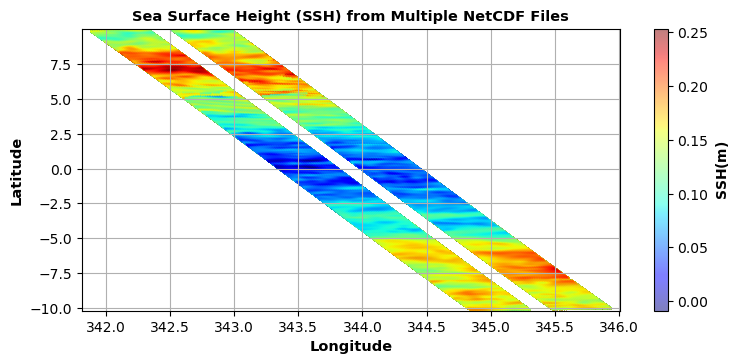

In [2]:
# Path to the directory containing NetCDF files
netcdf_dir = 'C:/Users/PC-M2OA/Desktop/vue_ens_2019_2023/SWOT/SWOT_module/'

# Define the latitude range
latmin, latmax = -10, 10

# Visualization
plt.figure(figsize=(8, 4))  

# List of NetCDF files
file_names = [f for f in os.listdir(netcdf_dir) if f.endswith('.nc')]

# Iterate over all NetCDF files in the directory
for file_name in file_names:
    file_path = os.path.join(netcdf_dir, file_name)
    
    # Open the NetCDF file
    with Dataset(file_path, 'r') as nc:
        # Read latitude, longitude, and SSH data
        lats = nc.variables['latitude'][:]
        lons = nc.variables['longitude'][:]
        ssh = nc.variables['ssha_noiseless'][:]
        
        # Filter data based on latitude
        indlat = np.argwhere((lats[:, 0] > latmin) & (lats[:, 0] < latmax)).flatten()
        lat = lats[indlat, :]
        lon = lons[indlat, :]
        ssh = ssh[indlat, :]
        
        # Flatten the data for plotting
        lon_flattened = lon.flatten()
        lat_flattened = lat.flatten()
        ssh_flattened = ssh.flatten()
        
        # Plot the data from each file
        plt.scatter(lon_flattened, lat_flattened, c=ssh_flattened, cmap='jet', s=0.2, alpha=0.5, label=file_name)

# Add labels, a title, and a color bar
plt.xlabel('Longitude', fontsize=10.5, fontweight='bold')
plt.ylabel('Latitude', fontsize=10.5, fontweight='bold')
plt.title('Sea Surface Height (SSH) from Multiple NetCDF Files', fontsize=10.5, fontweight='bold')
cbar = plt.colorbar(label= r'$\mathbf{SSH (m)}$')
plt.grid(True)

# Adjust axis limits based on the total data
plt.xlim(lon_flattened.min(), lon_flattened.max())
plt.ylim(lat_flattened.min(), lat_flattened.max())

# Adjust layout to avoid overlaps
plt.tight_layout(pad=2.0)  

# Save the figure
plt.savefig("fig9_mode.png", bbox_inches='tight')   
plt.show()

## Projection of SSH from Multiple SWOT NetCDF Files

C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:4455: UserWarning: Warning: converting a masked element to nan.
  c = np.asanyarray(c, dtype=float)


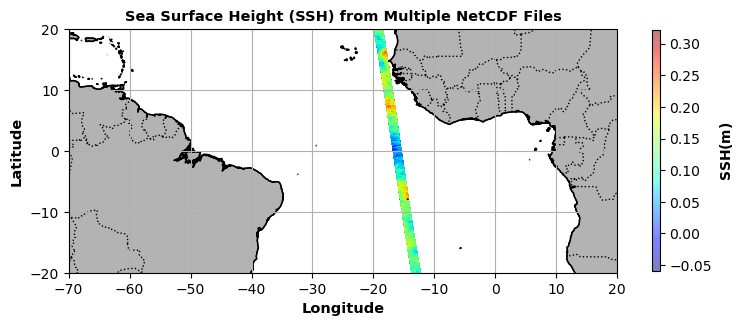

In [3]:
# Path to the directory containing the NetCDF files
netcdf_dir = 'C:/Users/PC-M2OA/Desktop/vue_ens_2019_2023/SWOT/SWOT_module/'

# Define the latitude range
latmin, latmax = -20, 20

# Create a figure for plotting with Cartopy
plt.figure(figsize=(8, 4))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add geographic features
ax.coastlines(resolution='10m', color='black')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='0.7', edgecolor='k')

# List of NetCDF files
file_names = [f for f in os.listdir(netcdf_dir) if f.endswith('.nc')]

# Initialize lists for global data
all_lons = []
all_lats = []
all_ssh = []

# Iterate over all NetCDF files in the directory
for file_name in file_names:
    file_path = os.path.join(netcdf_dir, file_name)
    
    try:
        # Open the NetCDF file
        with Dataset(file_path, 'r') as nc:
            # Read latitude, longitude, and SSH data
            lats = nc.variables['latitude'][:]
            lons = nc.variables['longitude'][:]
            ssh = nc.variables['ssha_noiseless'][:]
            
            # Filter data based on latitude
            indlat = np.where((lats[:, 0] > latmin) & (lats[:, 0] < latmax))[0]
            lat = lats[indlat, :]
            lon = lons[indlat, :]
            ssh = ssh[indlat, :]
            
            # Flatten the data for plotting
            lon_flattened = lon.flatten()
            lat_flattened = lat.flatten()
            ssh_flattened = ssh.flatten()
            
            # Add the data to global lists
            all_lons.extend(lon_flattened)
            all_lats.extend(lat_flattened)
            all_ssh.extend(ssh_flattened)
    
    except Exception as e:
        print(f"Error with file {file_name}: {e}")

# Plot the data with Cartopy projection
sc = ax.scatter(all_lons, all_lats, c=all_ssh, cmap='jet', s=0.2, alpha=0.5, transform=ccrs.PlateCarree())

# Add labels, a title, and a color bar
plt.xlabel('Longitude', fontsize=10.5, fontweight='bold')
plt.ylabel('Latitude', fontsize=10.5, fontweight='bold')
plt.title('Sea Surface Height (SSH) from Multiple NetCDF Files', fontsize=10.5, fontweight='bold')
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', label=r'$\mathbf{SSH (m)}$', shrink=0.7, aspect=30)

# Specify axis limits and ticks
ax.set_extent([-70, 20, -20, 20], crs=ccrs.PlateCarree())  # Longitude and latitude limits
ax.set_xticks(np.arange(-70, 21, 10))  # Longitude ticks every 10 degrees
ax.set_yticks(np.arange(-20, 21, 10))  # Latitude ticks every 10 degrees
plt.grid(True)

# Adjust layout to avoid overlaps
plt.tight_layout(pad=2.0)

# Save the figure
plt.savefig("fig10_mode_projection.png", bbox_inches='tight')  
plt.show()

## Visualization of the SSH trace from SWOT and the trajectory of the drifter.

## File location and name

In [5]:
dir_data = 'C:/Users/PC-M2OA/Desktop/vue_ens_2019_2023/SWOT/SWOT_module/'
name_winter = 'SWOT_L3_LR_SSH_Expert_497_018_20230421T085513_20230421T094618_v0.3.nc'
ds = xr.open_dataset(dir_data+name_winter)

fn='./drifter_6hour_qc_c452_ec74_11dc_U1720711192841.nc';
ds_w=xr.open_dataset(fn);

## Plot 1

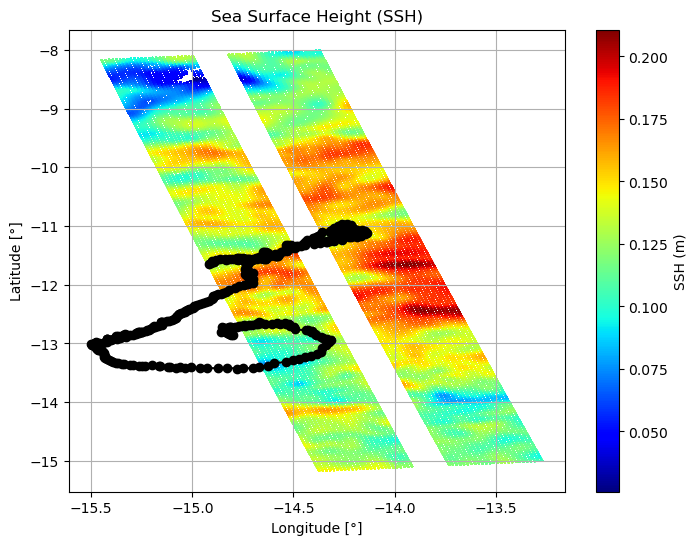

In [6]:
ds = xr.open_dataset(dir_data+name_winter)

# Function to adjust longitudes to the range -180 to 180
def adjust_longitude(lon):
    lon[lon > 180] -= 360
    return lon

# Definition of latitude limits
latmin, latmax = -15, -8

# Filtering data by latitude
indlat = np.argwhere((ds.latitude.values[:,0] > latmin) & (ds.latitude.values[:,0] < latmax))
lat = ds.latitude.values[indlat,:]
lon = ds.longitude.values[indlat,:]
ssh = ds.ssha_noiseless.values[indlat,:]

# Adjust longitudes to the range -180 to 180
lon = adjust_longitude(lon)

# Filter longitudes between 70W and 20E
indlon = np.argwhere((lon[:,0] >= -20) & (lon[:,0] <= -10))
lat_1 = lat[indlon]
lon_1 = lon[indlon]
ssh_1 = ssh[indlon]

# Create the figure
plt.figure(figsize=(8, 6))

# Plot the scatter plot with adjusted and filtered longitudes
plt.scatter(lon_1, lat_1, c=ssh_1, s=0.2, cmap='jet')

# Color bar based on sea surface height values
plt.colorbar(label='SSH (m)')

# Read Drifter data
fn='./drifter_6hour_qc_c452_ec74_11dc_U1720711192841.nc';
ds_w=xr.open_dataset(fn);

# Extract drifter coordinates 
drifter_lon = ds_w.longitude.values
drifter_lat = ds_w.latitude.values

# Plot drifter trajectory with scatter
plt.plot(drifter_lon[1040:1444], drifter_lat[1040:1444], color='black', marker='o', linestyle='-')

# Title and axis labels
plt.title('Sea Surface Height (SSH)')
plt.xlabel('Longitude [°]')
plt.ylabel('Latitude [°]')
plt.grid(True)
plt.show()

## Plot 2

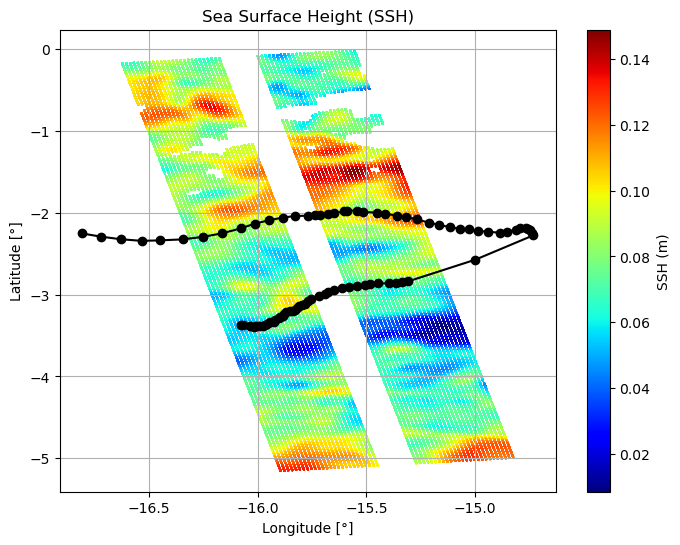

In [7]:
 ds = xr.open_dataset(dir_data+name_winter)

# Function to adjust longitudes to the range -180 to 180
def adjust_longitude(lon):
    lon[lon > 180] -= 360
    return lon

# Definition of latitude limits
latmin, latmax = -5, 0

# Filtering data by latitude
indlat = np.argwhere((ds.latitude.values[:,0] > latmin) & (ds.latitude.values[:,0] < latmax))
lat = ds.latitude.values[indlat,:]
lon = ds.longitude.values[indlat,:]
ssh = ds.ssha_noiseless.values[indlat,:]

# Adjust longitudes to the range -180 to 180
lon = adjust_longitude(lon)

# Filter longitudes between 70W and 20E
indlon = np.argwhere((lon[:,0] >= -17) & (lon[:,0] <= -5))
lat_2 = lat[indlon]
lon_2 = lon[indlon]
ssh_2 = ssh[indlon]

# Create the figure
plt.figure(figsize=(8, 6))

# Plot the scatter plot with adjusted and filtered longitudes
plt.scatter(lon_2, lat_2, c=ssh_2, s=0.2, cmap='jet')

# Color bar based on sea surface height values
plt.colorbar(label='SSH (m)')

# Read Drifter data
fn='./drifter_6hour_qc_c452_ec74_11dc_U1720711192841.nc';
ds_w=xr.open_dataset(fn);

# Extract drifter coordinates 
drifter_lon = ds_w.longitude.values
drifter_lat = ds_w.latitude.values

# Plot drifter trajectory with scatter
plt.plot(drifter_lon[11225:11309], drifter_lat[11225:11309], color='black', marker='o', linestyle='-')

# Title and axis labels
plt.title('Sea Surface Height (SSH)')
plt.xlabel('Longitude [°]')
plt.ylabel('Latitude [°]')
plt.grid(True)
plt.show()

## Plot 3

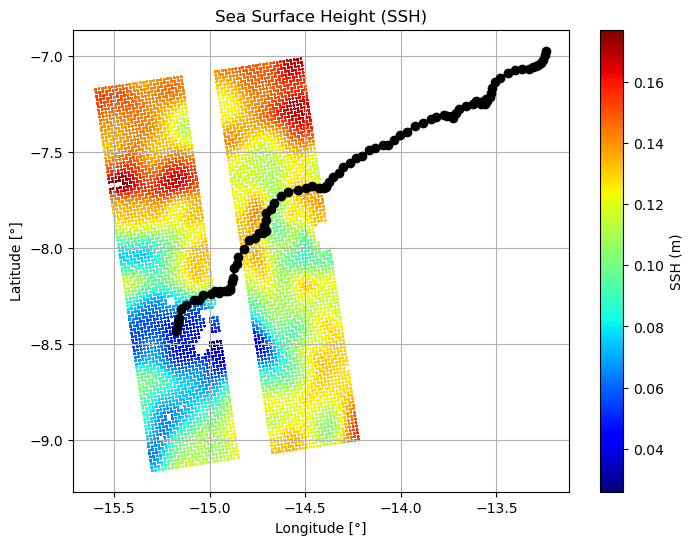

In [8]:
ds = xr.open_dataset(dir_data+name_winter)

# Function to adjust longitudes to the range -180 to 180
def adjust_longitude(lon):
    lon[lon > 180] -= 360
    return lon

# Definition of latitude limits
latmin, latmax = -9, -7

# Filtering data by latitude
indlat = np.argwhere((ds.latitude.values[:,0] > latmin) & (ds.latitude.values[:,0] < latmax))
lat = ds.latitude.values[indlat,:]
lon = ds.longitude.values[indlat,:]
ssh = ds.ssha_noiseless.values[indlat,:]

# Adjust longitudes to the range -180 to 180
lon = adjust_longitude(lon)

# Filter longitudes between 70W and 20E
indlon = np.argwhere((lon[:,0] >= -16) & (lon[:,0] <= -14.2))
lat_3 = lat[indlon]
lon_3 = lon[indlon]
ssh_3 = ssh[indlon]

# Create the figure
plt.figure(figsize=(8, 6))

# Plot the scatter plot with adjusted and filtered longitudes
plt.scatter(lon_3, lat_3, c=ssh_3, s=0.2, cmap='jet')

# Color bar based on sea surface height values
plt.colorbar(label='SSH (m)')

# Read Drifter data
fn='./drifter_6hour_qc_c452_ec74_11dc_U1720711192841.nc';
ds_w=xr.open_dataset(fn);

# Extract drifter coordinates 
drifter_lon = ds_w.longitude.values
drifter_lat = ds_w.latitude.values

# Plot drifter trajectory with scatter
plt.plot(drifter_lon[12390:12484], drifter_lat[12390:12484], color='black', marker='o', linestyle='-')

# Title and axis labels
plt.title('Sea Surface Height (SSH)')
plt.xlabel('Longitude [°]')
plt.ylabel('Latitude [°]')
plt.grid(True)
plt.show()

## Plot 4

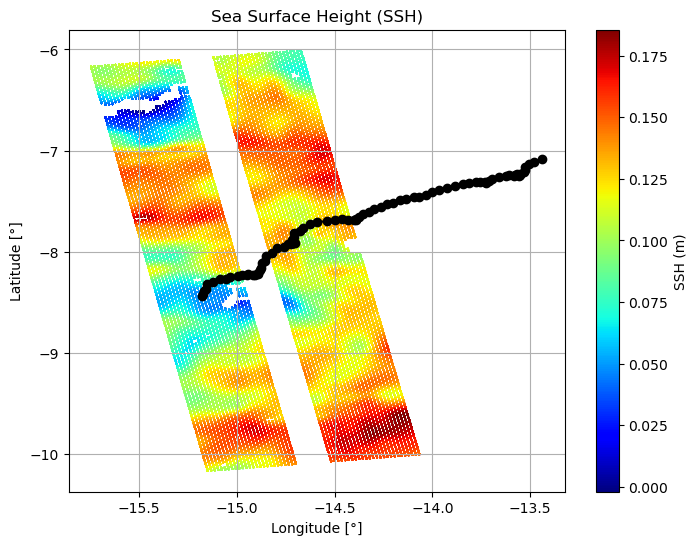

In [9]:
ds = xr.open_dataset(dir_data+name_winter)

# Function to adjust longitudes to the range -180 to 180
def adjust_longitude(lon):
    lon[lon > 180] -= 360
    return lon

# Definition of latitude limits
latmin, latmax = -10, -6

# Filtering data by latitude
indlat = np.argwhere((ds.latitude.values[:,0] > latmin) & (ds.latitude.values[:,0] < latmax))
lat = ds.latitude.values[indlat,:]
lon = ds.longitude.values[indlat,:]
ssh = ds.ssha_noiseless.values[indlat,:]

# Adjust longitudes to the range -180 to 180
lon = adjust_longitude(lon)

# Filter longitudes between 70W and 20E
indlon = np.argwhere((lon[:,0] >= -16) & (lon[:,0] <= -14))
lat_4 = lat[indlon]
lon_4 = lon[indlon]
ssh_4 = ssh[indlon]

# Create the figure
plt.figure(figsize=(8, 6))
# Plot the scatter plot with adjusted and filtered longitudes
plt.scatter(lon_4, lat_4, c=ssh_4, s=0.2, cmap='jet')

# Color bar based on sea surface height values
plt.colorbar(label='SSH (m)')

# Read Drifter data
fn='./drifter_6hour_qc_c452_ec74_11dc_U1720711192841.nc';
ds_w=xr.open_dataset(fn);

# Extract drifter coordinates 
drifter_lon = ds_w.longitude.values
drifter_lat = ds_w.latitude.values

# Plot drifter trajectory with scatter
plt.plot(drifter_lon[12400:12484], drifter_lat[12400:12484], color='black', marker='o', linestyle='-')

# Title and axis labels
plt.title('Sea Surface Height (SSH)')
plt.xlabel('Longitude [°]')
plt.ylabel('Latitude [°]')
plt.grid(True)
plt.show()

## Plot 5

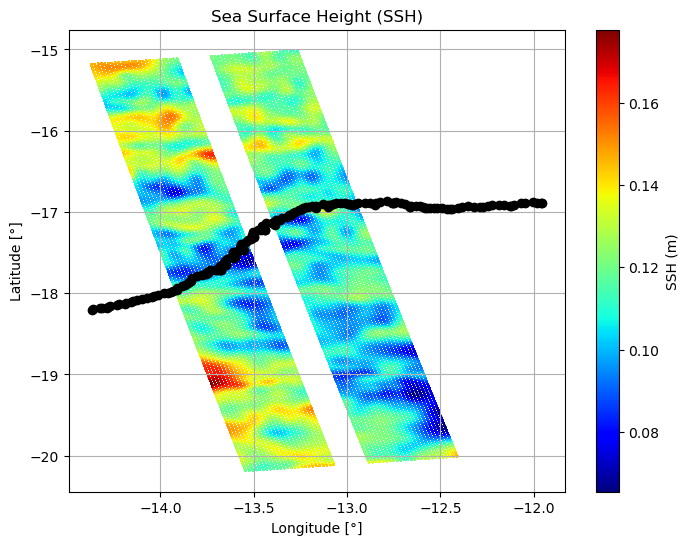

In [10]:
ds = xr.open_dataset(dir_data+name_winter)

# Function to adjust longitudes to the range -180 to 180
def adjust_longitude(lon):
    lon[lon > 180] -= 360
    return lon

# Definition of latitude limits
latmin, latmax = -20, -15

# Filtering data by latitude
indlat = np.argwhere((ds.latitude.values[:,0] > latmin) & (ds.latitude.values[:,0] < latmax))
lat = ds.latitude.values[indlat,:]
lon = ds.longitude.values[indlat,:]
ssh = ds.ssha_noiseless.values[indlat,:]

# Adjust longitudes to the range -180 to 180
lon = adjust_longitude(lon)

# Filter longitudes between 70W and 20E
indlon = np.argwhere((lon[:,0] >= -15) & (lon[:,0] <= -12))
lat_5 = lat[indlon]
lon_5 = lon[indlon]
ssh_5 = ssh[indlon]

# Create the figure
plt.figure(figsize=(8, 6))

# Plot the scatter plot with adjusted and filtered longitudes
plt.scatter(lon_5, lat_5, c=ssh_5, s=0.2, cmap='jet')

# Color bar based on sea surface height values
plt.colorbar(label='SSH (m)')

# Read Drifter data
fn='./drifter_6hour_qc_c452_ec74_11dc_U1720711192841.nc';
ds_w=xr.open_dataset(fn);

# Extract drifter coordinates 
drifter_lon = ds_w.longitude.values
drifter_lat = ds_w.latitude.values

# Plot drifter trajectory with scatter
plt.plot(drifter_lon[14145:14310], drifter_lat[14145:14310], color='black', marker='o', linestyle='-')

# Title and axis labels
plt.title('Sea Surface Height (SSH)')
plt.xlabel('Longitude [°]')
plt.ylabel('Latitude [°]')
plt.grid(True)
plt.show()

## Plot 6

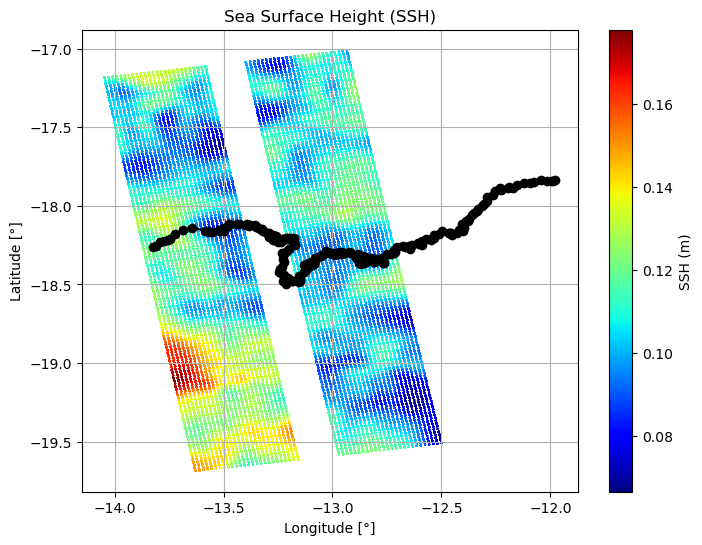

In [11]:
ds = xr.open_dataset(dir_data+name_winter)

# Function to adjust longitudes to the range -180 to 180
def adjust_longitude(lon):
    lon[lon > 180] -= 360
    return lon

# Definition of latitude limits
latmin, latmax = -19.5, -17

# Filtering data by latitude
indlat = np.argwhere((ds.latitude.values[:,0] > latmin) & (ds.latitude.values[:,0] < latmax))
lat = ds.latitude.values[indlat,:]
lon = ds.longitude.values[indlat,:]
ssh = ds.ssha_noiseless.values[indlat,:]

# Adjust longitudes to the range -180 to 180
lon = adjust_longitude(lon)

# Filter longitudes between 70W and 20E
indlon = np.argwhere((lon[:,0] >= -14) & (lon[:,0] <= -10))
lat_6 = lat[indlon]
lon_6 = lon[indlon]
ssh_6 = ssh[indlon]

# Create the figure
plt.figure(figsize=(8, 6))

# Plot the scatter plot with adjusted and filtered longitudes
plt.scatter(lon_6, lat_6, c=ssh_6, s=0.2, cmap='jet')

# Color bar based on sea surface height values
plt.colorbar(label='SSH (m)')

# Read Drifter data
fn='./drifter_6hour_qc_c452_ec74_11dc_U1720711192841.nc';
ds_w=xr.open_dataset(fn);

# Extract drifter coordinates 
drifter_lon = ds_w.longitude.values
drifter_lat = ds_w.latitude.values

# Plot drifter trajectory with scatter
plt.plot(drifter_lon[14780:15002], drifter_lat[14780:15002], color='black', marker='o', linestyle='-')

# Title and axis labels
plt.title('Sea Surface Height (SSH)')
plt.xlabel('Longitude [°]')
plt.ylabel('Latitude [°]')
plt.grid(True)
plt.show()

## let's plot all

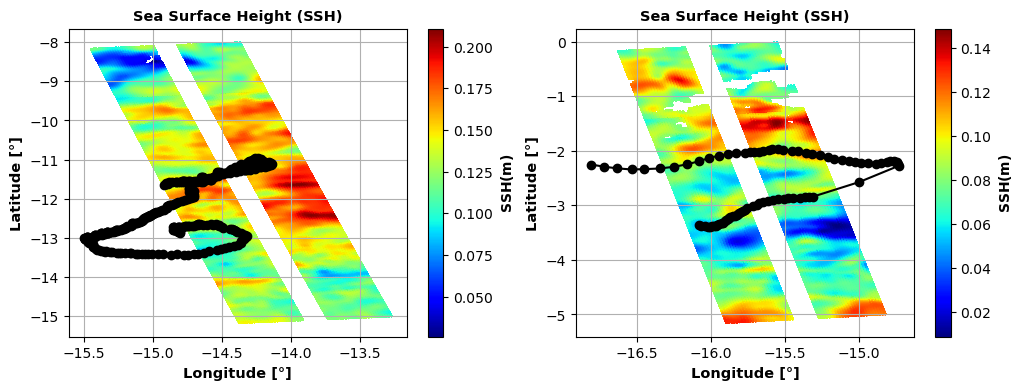

In [12]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)  # Premier sous-graphique
# Plot the scatter plot with adjusted and filtered longitudes
plt.scatter(lon_1, lat_1, c=ssh_1, s=0.2, cmap='jet')

# Color bar based on sea surface height values
plt.colorbar(label=r'$\mathbf{SSH (m)}$')

# Read Drifter data
fn='./drifter_6hour_qc_c452_ec74_11dc_U1720711192841.nc';
ds_w=xr.open_dataset(fn);

# Extract drifter coordinates 
drifter_lon = ds_w.longitude.values
drifter_lat = ds_w.latitude.values

# Plot drifter trajectory with scatter
plt.plot(drifter_lon[1040:1444], drifter_lat[1040:1444], color='black', marker='o', linestyle='-')

# Title and axis labels
plt.title('Sea Surface Height (SSH)', fontsize=10.5, fontweight='bold')
plt.xlabel('Longitude [°]', fontsize=10.5, fontweight='bold')
plt.ylabel('Latitude [°]', fontsize=10.5, fontweight='bold')
plt.grid(True)
plt.subplot(1, 2, 2)  # Premier sous-graphique
# Plot the scatter plot with adjusted and filtered longitudes
plt.scatter(lon_2, lat_2, c=ssh_2, s=0.2, cmap='jet')

# Color bar based on sea surface height values
plt.colorbar(label=r'$\mathbf{SSH (m)}$')

# Read Drifter data
fn='./drifter_6hour_qc_c452_ec74_11dc_U1720711192841.nc';
ds_w=xr.open_dataset(fn);

# Extract drifter coordinates 
drifter_lon = ds_w.longitude.values
drifter_lat = ds_w.latitude.values

# Plot drifter trajectory with scatter
plt.plot(drifter_lon[11225:11309], drifter_lat[11225:11309], color='black', marker='o', linestyle='-')

# Title and axis labels
plt.title('Sea Surface Height (SSH)', fontsize=10.5, fontweight='bold')
plt.xlabel('Longitude [°]', fontsize=10.5, fontweight='bold')
plt.ylabel('Latitude [°]', fontsize=10.5, fontweight='bold')
plt.grid(True)
plt.savefig("fig11_mode_projection.png", bbox_inches='tight')  
plt.show()

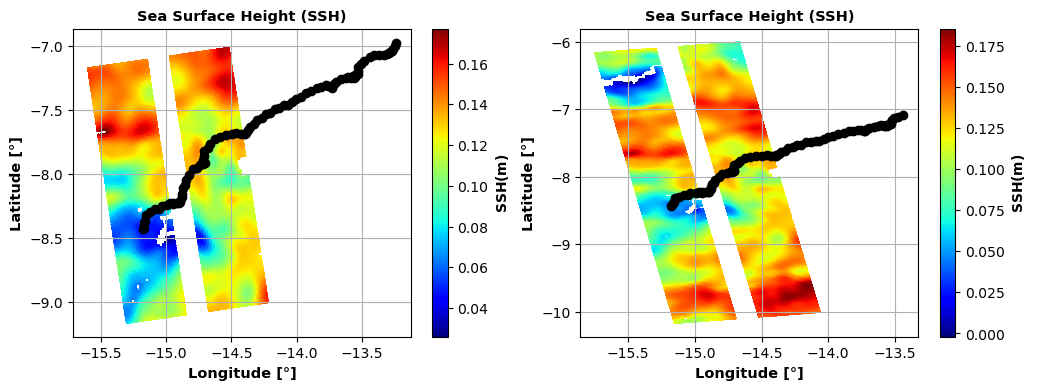

In [13]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)  # Premier sous-graphique
# Plot the scatter plot with adjusted and filtered longitudes
plt.scatter(lon_3, lat_3, c=ssh_3, s=0.2, cmap='jet')

# Color bar based on sea surface height values
plt.colorbar(label=r'$\mathbf{SSH (m)}$')

# Read Drifter data
fn='./drifter_6hour_qc_c452_ec74_11dc_U1720711192841.nc';
ds_w=xr.open_dataset(fn);

# Extract drifter coordinates 
drifter_lon = ds_w.longitude.values
drifter_lat = ds_w.latitude.values

# Plot drifter trajectory with scatter
plt.plot(drifter_lon[12390:12484], drifter_lat[12390:12484], color='black', marker='o', linestyle='-')

# Title and axis labels
plt.title('Sea Surface Height (SSH)', fontsize=10.5, fontweight='bold')
plt.xlabel('Longitude [°]', fontsize=10.5, fontweight='bold')
plt.ylabel('Latitude [°]', fontsize=10.5, fontweight='bold')
plt.grid(True)
plt.subplot(1, 2, 2)  # Premier sous-graphique
# Plot the scatter plot with adjusted and filtered longitudes
plt.scatter(lon_4, lat_4, c=ssh_4, s=0.2, cmap='jet')

# Color bar based on sea surface height values
plt.colorbar(label=r'$\mathbf{SSH (m)}$')

# Read Drifter data
fn='./drifter_6hour_qc_c452_ec74_11dc_U1720711192841.nc';
ds_w=xr.open_dataset(fn);

# Extract drifter coordinates 
drifter_lon = ds_w.longitude.values
drifter_lat = ds_w.latitude.values

# Plot drifter trajectory with scatter
plt.plot(drifter_lon[12400:12484], drifter_lat[12400:12484], color='black', marker='o', linestyle='-')

# Title and axis labels
plt.title('Sea Surface Height (SSH)', fontsize=10.5, fontweight='bold')
plt.xlabel('Longitude [°]', fontsize=10.5, fontweight='bold')
plt.ylabel('Latitude [°]', fontsize=10.5, fontweight='bold')
plt.grid(True)
plt.savefig("fig12_mode_projection.png", bbox_inches='tight')  
plt.show()

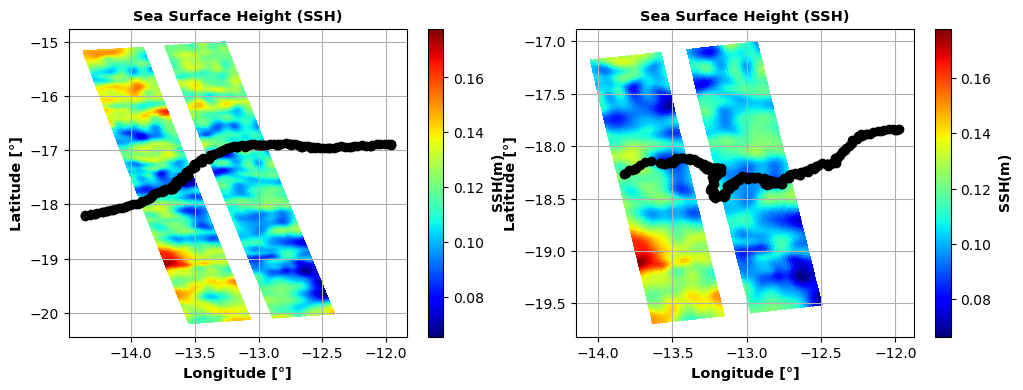

In [14]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)  # Premier sous-graphique
# Plot the scatter plot with adjusted and filtered longitudes
plt.scatter(lon_5, lat_5, c=ssh_5, s=0.2, cmap='jet')

# Color bar based on sea surface height values
plt.colorbar(label=r'$\mathbf{SSH (m)}$')

# Read Drifter data
fn='./drifter_6hour_qc_c452_ec74_11dc_U1720711192841.nc';
ds_w=xr.open_dataset(fn);

# Extract drifter coordinates 
drifter_lon = ds_w.longitude.values
drifter_lat = ds_w.latitude.values

# Plot drifter trajectory with scatter
plt.plot(drifter_lon[14145:14310], drifter_lat[14145:14310], color='black', marker='o', linestyle='-')

# Title and axis labels
plt.title('Sea Surface Height (SSH)', fontsize=10.5, fontweight='bold')
plt.xlabel('Longitude [°]', fontsize=10.5, fontweight='bold')
plt.ylabel('Latitude [°]', fontsize=10.5, fontweight='bold')
plt.grid(True)
plt.subplot(1, 2, 2)  # Premier sous-graphique
# Plot the scatter plot with adjusted and filtered longitudes
plt.scatter(lon_6, lat_6, c=ssh_6, s=0.2, cmap='jet')

# Color bar based on sea surface height values
plt.colorbar(label=r'$\mathbf{SSH (m)}$')

# Read Drifter data
fn='./drifter_6hour_qc_c452_ec74_11dc_U1720711192841.nc';
ds_w=xr.open_dataset(fn);

# Extract drifter coordinates 
drifter_lon = ds_w.longitude.values
drifter_lat = ds_w.latitude.values

# Plot drifter trajectory with scatter
plt.plot(drifter_lon[14780:15002], drifter_lat[14780:15002], color='black', marker='o', linestyle='-')

# Title and axis labels
plt.title('Sea Surface Height (SSH)', fontsize=10.5, fontweight='bold')
plt.xlabel('Longitude [°]', fontsize=10.5, fontweight='bold')
plt.ylabel('Latitude [°]', fontsize=10.5, fontweight='bold')
plt.grid(True)
plt.savefig("fig13_mode_projection.png", bbox_inches='tight')  
plt.show()